In [103]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [104]:
loaddata_train1=np.loadtxt('E:/24510013/ML/synthetic_data/nonlinearlySeparable/group4/class1_train.txt')
loaddata_train2=np.loadtxt('E:/24510013/ML/synthetic_data/nonlinearlySeparable/group4/class2_train.txt')
loaddata_test1=np.loadtxt('E:/24510013/ML/synthetic_data/nonlinearlySeparable/group4/class1_test.txt')
loaddata_test2=np.loadtxt('E:/24510013/ML/synthetic_data/nonlinearlySeparable/group4/class2_test.txt')

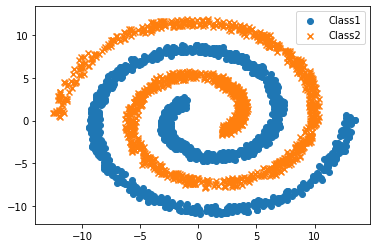

In [105]:
plt.scatter(loaddata_train1[:,0], loaddata_train1[:,1], marker='o', label='Class1')
plt.scatter(loaddata_train2[:,0], loaddata_train2[:,1], marker='x', label='Class2')

plt.legend()
plt.show()

In [106]:
loaddata_train1.shape

(1223, 2)

In [107]:
l1=np.zeros((loaddata_train1.shape[0], 1))
l2=np.ones((loaddata_train2.shape[0], 1))
train1=np.append(loaddata_train1,l1,axis=1)
train2=np.append(loaddata_train2,l2,axis=1)
dataset=np.concatenate((train1,train2))

In [108]:
dataset

array([[-1.2279 , -3.365  ,  0.     ],
       [ 4.7848 , -9.9872 ,  0.     ],
       [-4.7808 , -7.8652 ,  0.     ],
       ...,
       [ 9.8043 , -1.3197 ,  1.     ],
       [ 2.5433 , -0.77322,  1.     ],
       [-2.5056 ,  5.462  ,  1.     ]])

In [109]:
x=dataset[:,:2].T
y=dataset[:,2]
y=y.reshape(1,y.shape[0])

In [110]:
l1=np.zeros((loaddata_test1.shape[0], 1))
l2=np.ones((loaddata_test2.shape[0], 1))
test1=np.append(loaddata_test1,l1,axis=1)
test2=np.append(loaddata_test2,l2,axis=1)
test_dataset=np.concatenate((test1,test2))

In [111]:
x_test=test_dataset[:,:2].T
y_test=test_dataset[:,2]
y_test=y_test.reshape(1,y_test.shape[0])
y_test.shape

(1, 977)

In [112]:
m=x.shape[1]

In [113]:
m

2447

In [114]:
def initialize_para(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    
    return parameters

In [115]:
initialize_para(2,4,1)

{'w1': array([[ 0.01065316, -0.02432317],
        [ 0.01713576, -0.00149853],
        [ 0.00668744,  0.01763069],
        [ 0.00555232,  0.01413357]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]), 'w2': array([[ 0.00611088,  0.00931195, -0.00106385, -0.01005794]]), 'b2': array([[0.]])}

In [116]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [117]:
sigmoid(-1)

0.2689414213699951

In [118]:
def forward_prop(x,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    fp={'z1':z1,
        'a1':a1,
        'z2':z2,
        'a2':a2}
    
    return(a2,fp)

In [119]:

def compute_cost(a2, y, parameters):
    
    m = y.shape[1] 
    logprobs = np.multiply(np.log(a2),y)+np.multiply(np.log(1-a2),(1-y))
    cost = - np.sum(logprobs) /m
    
    cost = float(np.squeeze(cost)) 
    assert(isinstance(cost, float))
    
    return cost

In [120]:
def backward_prop(parameters, fp, x, y):

    m = x.shape[1]
 
    w1 = parameters["w1"]
    w2 = parameters["w2"]

    a1 = fp["a1"]
    a2 = fp["a2"]
    
    dZ2 = a2-y
    dW2 = np.dot(dZ2,a1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = (np.dot(w2.T,dZ2))*(1 - np.power(a1, 2))
    dW1 = np.dot(dZ1,x.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m

    
    bp = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return bp

In [121]:

def update_parameters(parameters, bp, learning_rate = 1.2):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    dW1 = bp["dW1"]
    db1 = bp["db1"]
    dW2 = bp["dW2"]
    db2 = bp["db2"]

    w1 = w1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    w2 = w2-learning_rate*dW2
    b2 = b2-learning_rate*db2

    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    
    return parameters

In [146]:
def model(x,y,n_h=4,itr=10000):
    n_x=x.shape[0]
    n_y=y.shape[0]
    
    parameters=initialize_para(n_x,n_h,n_y)
    for i in range(itr):
        a2,fp=forward_prop(x,parameters)
        cost = compute_cost(a2, y, parameters)
        bp = backward_prop(parameters, fp, x, y)
        parameters = update_parameters(parameters, bp, learning_rate = 1.2)
        
    return parameters

In [138]:
model(x,y,n_h=4,itr=10000)

{'w1': array([[ 0.05351545, -2.79247162],
        [ 2.98824051, -1.69435254],
        [-1.79896434,  0.98258594],
        [-0.02799918, -1.62725853]]), 'b1': array([[ -3.09221794],
        [  9.2293402 ],
        [ -4.12828359],
        [-14.02325509]]), 'w2': array([[-0.46465466, -1.98468542, -2.15932929, -3.96013201]]), 'b2': array([[-3.77220843]])}

In [139]:
def predict(parameters,x):
    a2,fp=forward_prop(x,parameters)
    predn=a2>0.5
    return(predn)

In [154]:
parameters=model(x,y,11,itr=10000)
y_hat=predict(parameters,x)


In [155]:
print ('Accuracy: %d' % float((np.dot(y,y_hat.T) + np.dot(1-y,1-y_hat.T))/float(y.size)*100) + '%')

Accuracy: 78%


In [80]:
parameters=model(x_test,y_test,n_h=4,itr=10000)
y_hat=predict(parameters,x_test)

In [81]:
print ('Accuracy: %d' % float((np.dot(y_test,y_hat.T) + np.dot(1-y_test,1-y_hat.T))/float(y_test.size)*100) + '%')

Accuracy: 65%


In [149]:
p=np.arange(dataset[:,0].min()-1,dataset[:,0].max()+1,0.1)
q=np.arange(dataset[:,1].min()-1,dataset[:,1].max()+1,0.1)
xx,yy=np.meshgrid(p,q)
d=np.array([xx.ravel(),yy.ravel()])

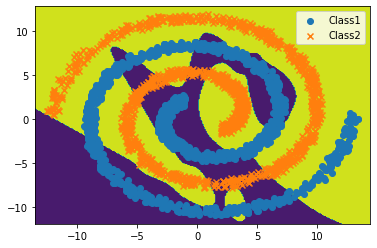

In [156]:

y_hat=predict(parameters,d)
plt.contourf(xx,yy,y_hat.reshape(xx.shape))
plt.scatter(loaddata_train1[:,0], loaddata_train1[:,1], marker='o', label='Class1')
plt.scatter(loaddata_train2[:,0], loaddata_train2[:,1], marker='x', label='Class2')

plt.legend()
plt.show()